# TASK 6.6 - Sourcing & Analyzing Time Series Data

#### Table of Content

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. Preparing the Data
5. Creating a Line Chart
6. Decomposing the Data
7. Testing for Stationarity
8. Stationarizing the Data
9. Stationarizing the Data (second round)

# 1. Importing Libraries & Options

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import os
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Removing the max column cap

pd.options.display.max_columns = None

# 2. Importing Dataframe

In [3]:
# Creating a path for main dataframe

path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis/02 Data'

In [4]:
# Importing dataframe

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'listings_clean.csv'), index_col = False)

# 3. Checking the Data

In [5]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,54730,2009-11-16,within a few hours,100,85,f,3.0,t,t,Islington,51.56861,-0.11270,Private room in rental unit,Private room,2,1 shared bath,1.0,1.76,65.0,1,29,t,26,56,86,361,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,2,1,1,0,0.16
1,15400,60302,2009-12-05,within a day,67,50,f,1.0,t,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.00,75.0,3,50,t,0,0,0,4,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,1,1,0,0,0.61
2,17402,67564,2010-01-04,within an hour,80,70,f,18.0,t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.00,265.0,4,365,t,4,34,60,295,43,1,0,2011-03-21,2021-06-28,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,1,1,0,0,0.33
3,17506,67915,2010-01-05,Unknown,89,75,f,3.0,t,t,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.00,150.0,3,21,t,29,59,89,364,0,0,0,1900-01-01,1900-01-01,4.54,4.73,4.62,4.79,4.80,4.75,4.64,f,2,0,2,0,4.64
4,25123,103583,2010-04-05,Unknown,89,75,f,3.0,t,t,Barnet,51.57438,-0.21081,Private room in residential home,Private room,2,1.5 shared baths,1.0,1.76,29.0,10,1120,t,0,0,0,0,129,0,0,2010-04-14,2020-03-15,4.78,4.70,4.94,4.91,4.89,4.45,4.74,t,3,0,3,0,0.91


In [6]:
df.shape

(66582, 45)

### COMMENT

> I would like to perform a time-series on host subscriptions to Airbnb in London. 

> The dataframe I am using lists "host_since", which means I can find out (count) how many people signed-up to be hosts on each day since 14th August 2008 and until 6th December 2021. I believe it would be interesting to explore the evolution of the platform, the number of hosts signing up to Airbnb is a key metric of the platforms popularity, since they take a fee on each rentals. 

> First I need to remove duplicates (through 'host_id'), then I'll be able to have a quick look at unique sign-up rates through 'host_since'

> One caveat is that there hasn't been a new host signing up everyday, therefor my timeline has missing dates. To remedy this problem, I will create a new csv file with all the dates and I will merge it with my dataframe, to then be able to perform my timeseries analysis. 

# 4. Preparing the Data

### STEP 1: 
### (removing duplicates)

In [7]:
# Removing all duplicates from the 'host_id' column

df_no_dups = df.drop_duplicates(subset=['host_id'])

In [8]:
# Checking the result of my query

df_no_dups.shape

(44650, 45)

### STEP 2:

### (quick look at the data)

In [9]:
# Looking at the variable I am interested in analysing 
# indexed so I can see the head and the tail of the data (first & last dates).

df_no_dups['host_since'].value_counts().sort_index()

2008-08-14    1
2008-12-03    1
2008-12-27    1
2009-01-16    1
2009-03-07    1
             ..
2021-12-01    5
2021-12-03    1
2021-12-04    1
2021-12-05    1
2021-12-06    1
Name: host_since, Length: 4095, dtype: int64

In [10]:
# Converting variable to date format

df_no_dups['host_since'] = pd.to_datetime(df_no_dups['host_since'])

In [11]:
df_no_dups['host_since'].dtype

dtype('<M8[ns]')

<AxesSubplot:>

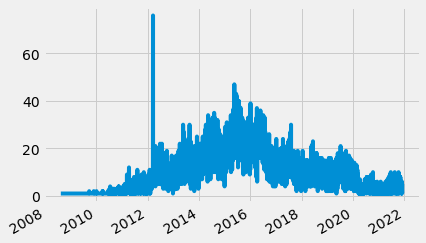

In [12]:
# Having a quick look at the data through a line plot
# I can see one outlier, for now I will do nothing with it 

df_no_dups['host_since'].value_counts().plot.line()

In [13]:
# Looking at the main outlier, 76 new hosts on 18th March 2012
# Even though this number is high, it's low enough to still be plausible (e.g. result of a marketing campaign)
# There is also another outlier the day before (17th March), 43 new hosts, which support this theory.

df_no_dups['host_since'].value_counts()

2012-03-18    76
2015-05-19    47
2012-03-17    43
2015-06-14    43
2015-06-22    42
              ..
2009-03-11     1
2010-09-10     1
2009-11-25     1
2010-03-28     1
2020-11-22     1
Name: host_since, Length: 4095, dtype: int64

### STEP 3: 
### (creating a subset for my timeseries)

In [14]:
# Preparing the modified original dataframe for timeseries analysis
# Extracting the two columns I will need into a subset

data = df_no_dups['host_since'].value_counts().sort_index()

In [15]:
data

2008-08-14    1
2008-12-03    1
2008-12-27    1
2009-01-16    1
2009-03-07    1
             ..
2021-12-01    5
2021-12-03    1
2021-12-04    1
2021-12-05    1
2021-12-06    1
Name: host_since, Length: 4095, dtype: int64

In [16]:
# Resetting the index of the subset, into a new dataframe

data_2 = data.reset_index()

In [17]:
# Checking the data

data_2 

,index,host_since
0,2008-08-14,1
1,2008-12-03,1
2,2008-12-27,1
3,2009-01-16,1
4,2009-03-07,1
...,...,...
4090,2021-12-01,5
4091,2021-12-03,1
4092,2021-12-04,1
4093,2021-12-05,1


In [18]:
# Renaming the column of my new dataframe

data_2.rename(columns = {'index' : 'date', 'host_since' : 'count_of_host'}, inplace = True)

In [19]:
# Checking the data, my dataframe is almost ready to use

data_2

,date,count_of_host
0,2008-08-14,1
1,2008-12-03,1
2,2008-12-27,1
3,2009-01-16,1
4,2009-03-07,1
...,...,...
4090,2021-12-01,5
4091,2021-12-03,1
4092,2021-12-04,1
4093,2021-12-05,1


In [20]:
data_2.dtypes

date             datetime64[ns]
count_of_host             int64
dtype: object

### STEP 4: 
### (importing new csv file to merge with subset)

> Here I will import a new dataframe, to merge with the one I just created.

> I created this new dataframe in Excel, it contains two columns; 'date', with all unique dates from 2008-08-14 until 2021-12-06 and 'count_of_host' with 0 in all rows. 

> <i> Please note: I decided to do this in Excel because I knew how to do it quickly and efficiently. 

In [21]:
# Converting the Excel file I created into a csv file, ready to import and merge

read_file = pd.read_excel (r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis/02 Data/Original Data/dates_airbnb_timeseries.xlsx')
read_file.to_csv (r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 6 - Advanced Analytics & Dashboard Design/04-2022 Airbnb Analysis/02 Data/Original Data/dates_airbnb_timeseries.csv', index = None, header=True)

In [22]:
# Importing the new csv file

df_dates = pd.read_csv(os.path.join(path, 'Original Data', 'dates_airbnb_timeseries.csv'), index_col = False)

In [23]:
# Checking the data

df_dates

,date,count_of_host
0,2008-08-14,0
1,2008-08-15,0
2,2008-08-16,0
3,2008-08-17,0
4,2008-08-18,0
...,...,...
4858,2021-12-02,0
4859,2021-12-03,0
4860,2021-12-04,0
4861,2021-12-05,0


In [24]:
df_dates.dtypes

date             object
count_of_host     int64
dtype: object

In [25]:
# Converting variable to date format

df_dates['date'] = pd.to_datetime(df_dates['date'])

In [26]:
df_dates.dtypes

date             datetime64[ns]
count_of_host             int64
dtype: object

### STEP 5:

### (merging the dataframes)

In [27]:
# Merging the dataframes

df_merged = df_dates.merge(data_2, on = 'date', indicator = True, how = 'left')

In [28]:
# It worked as expected 
# (although I realise now I did not need the extra count_of_host column, it's an easy fix)

df_merged

,date,count_of_host_x,count_of_host_y,_merge
0,2008-08-14,0,1.0,both
1,2008-08-15,0,NaN,left_only
2,2008-08-16,0,NaN,left_only
3,2008-08-17,0,NaN,left_only
4,2008-08-18,0,NaN,left_only
...,...,...,...,...
4858,2021-12-02,0,NaN,left_only
4859,2021-12-03,0,1.0,both
4860,2021-12-04,0,1.0,both
4861,2021-12-05,0,1.0,both


In [29]:
# Dropping the columns I don't need

df_merged_1 = df_merged.drop(columns = ['count_of_host_x', '_merge'])

In [30]:
# Renaming the column "count_of_host_y"

df_merged_1.rename(columns = {'count_of_host_y' : 'count_of_host'}, inplace = True)

In [31]:
# Replacing NaN values with 0

df_merged_1['count_of_host'].fillna(0, inplace=True)

In [32]:
# Checking the data (it all worked as expected)

df_merged_1.head()

,date,count_of_host
0,2008-08-14,1.0
1,2008-08-15,0.0
2,2008-08-16,0.0
3,2008-08-17,0.0
4,2008-08-18,0.0


In [33]:
# Checking the data (it all worked as expected)

df_merged_1['count_of_host'].sum()

44650.0

# 5. Creating a Line Chart

In [34]:
# Setting the "Date" column as the index

from datetime import datetime

df_merged_1['datetime'] = pd.to_datetime(df_merged_1['date']) 
df_merged_1 = df_merged_1.set_index('datetime') 
df_merged_1.drop(['date'], axis=1, inplace=True) 
df_merged_1.head()

,count_of_host
datetime,
2008-08-14,1.0
2008-08-15,0.0
2008-08-16,0.0
2008-08-17,0.0
2008-08-18,0.0


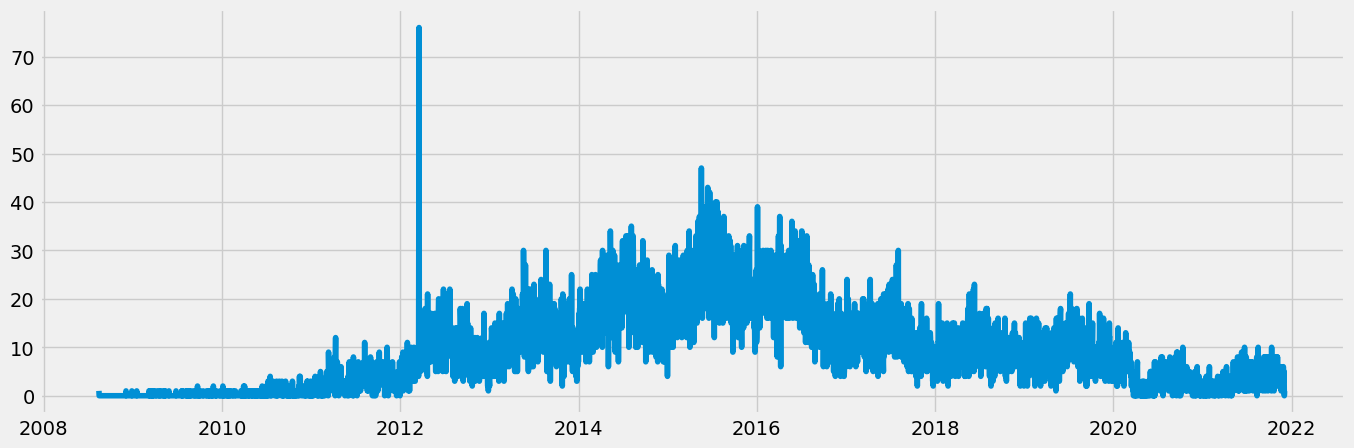

In [35]:
# Plotting the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_merged_1)

# 6. Decomposing the Data

In [36]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_merged_1, model='additive')

In [37]:
# Defining a fixed size for all special charts.

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

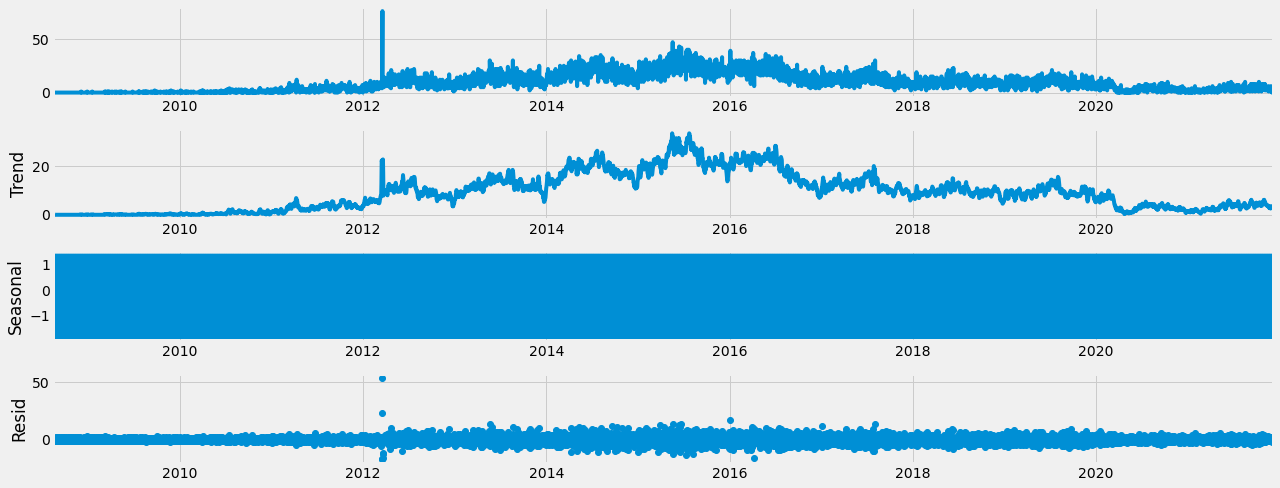

In [38]:
# Plotting the separate components

decomposition.plot()
plt.show()

### COMMENTS: 

> Here I have a clearer view of the trend. 

> The seasonality is surprising, does it mean there is no seasonality?

> Finally 'resid' showcases the noise, as expected the outliers show up here. 


# 7. Testing for Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_merged_1['count_of_host'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.804531
p-value                           0.378214
Number of Lags Used              29.000000
Number of Observations Used    4833.000000
Critical Value (1%)              -3.431704
Critical Value (5%)              -2.862138
Critical Value (10%)             -2.567088
dtype: float64


### COMMENT: 

> The test statistic (-1.80) is larger than the critical value 5% (-2.86), this mean I can’t reject null hypothesis.

> This means that there is a unit root in the data, and the data is non-stationary (as expected). 

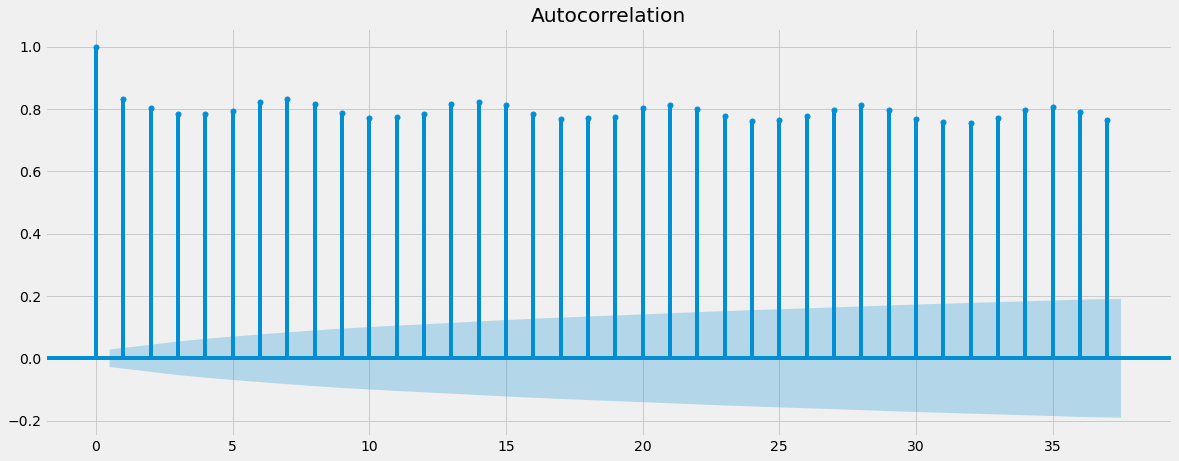

In [40]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_merged_1)
plt.show()

### COMMENT: 

> The vertical lines represent the lags in the series, while the blue area represents the confidence interval. Because the lines go above the blue edge of the confidence interval, this means I have lags that are significantly correlated with each other. And because there are many lags beyond this interval, I can deduce that the data is non-stationary. This means that here there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test.

# 8. Stationarizing the Data

In [41]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = df_merged_1 - df_merged_1.shift(1) 

In [42]:
# Here, I remove the missing values that came about as a result of the differencing. 

data_diff.dropna(inplace = True) 

In [43]:
data_diff.head()

,count_of_host
datetime,
2008-08-15,-1.0
2008-08-16,0.0
2008-08-17,0.0
2008-08-18,0.0
2008-08-19,0.0


In [44]:
data_diff.columns

Index(['count_of_host'], dtype='object')

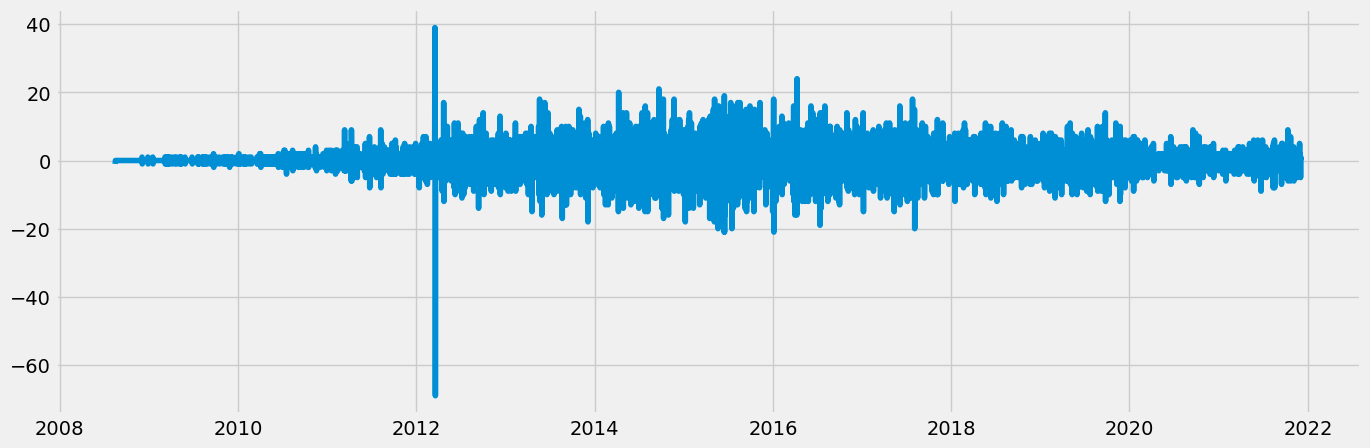

In [45]:
# Checking out what the differencing did to the time-series curve
# It looks very much stationary

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [46]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.778896e+01
p-value                        3.253356e-30
Number of Lags Used            3.200000e+01
Number of Observations Used    4.829000e+03
Critical Value (1%)           -3.431705e+00
Critical Value (5%)           -2.862139e+00
Critical Value (10%)          -2.567089e+00
dtype: float64


### COMMENT: 

> The test statistic (-17.78) is now much smaller than the critical value 5% (-2.86), moreover the p-value is now satisfactory (p<0.05), this mean I can reject the null hypothesis and consider my series stationary.

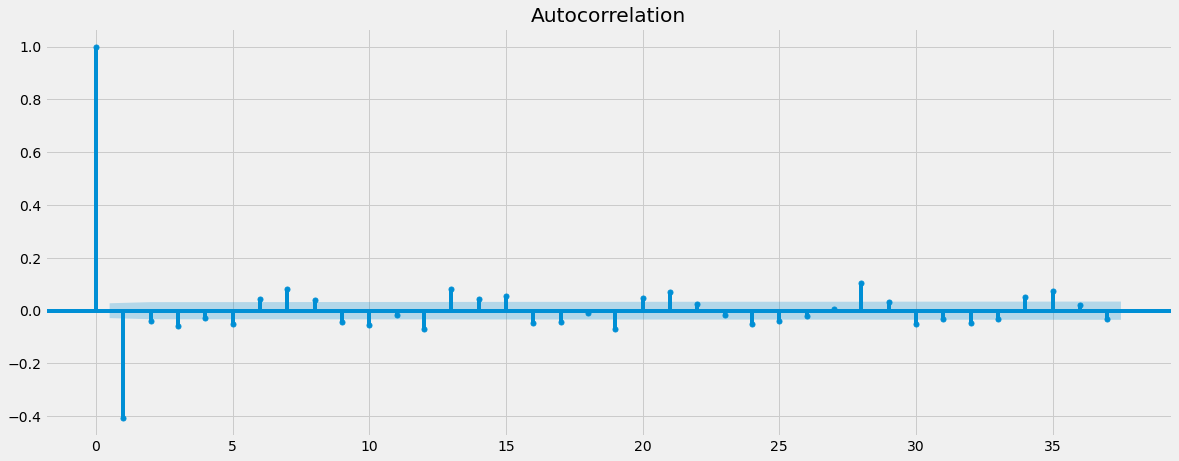

In [56]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()

### COMMENT: 

> The auto-correlation plot has greatly improved (there are fewer autocorrelated terms). It is however difficult to count whether it's good enough (lags within confidence interval). The data is stationary but I'm not 100% sure it's stationary enough. I will conduct another round of differencing to stationarize it further and reduce the remaining autocorrelated terms.

# 9. Stationarizing the Data (second round)


In [48]:
data_diff2 = data_diff - data_diff.shift(1) 

In [51]:
data_diff2.dropna(inplace = True) 

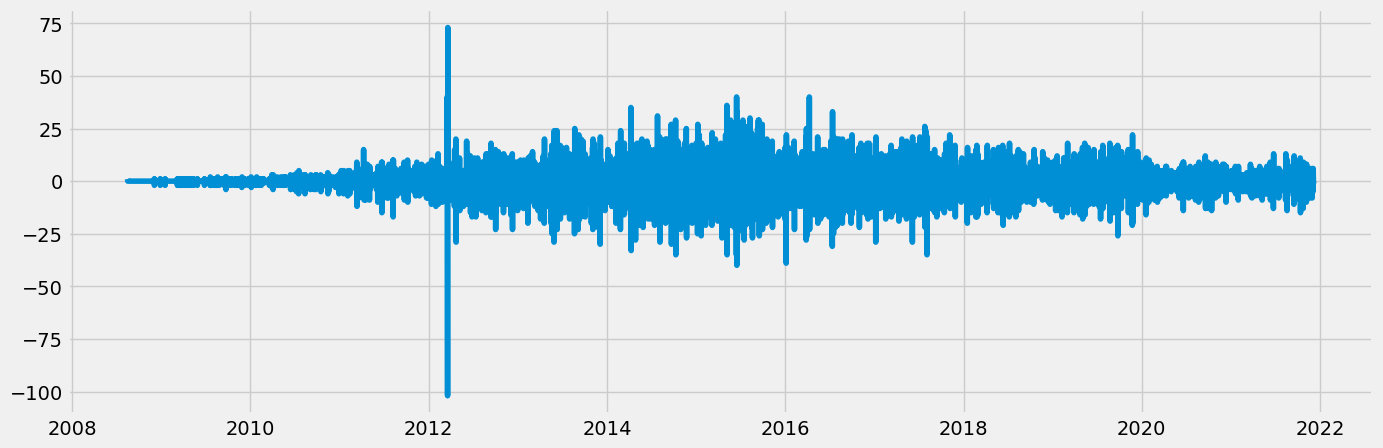

In [53]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [54]:
# The dickey fuller test presents even more conclusive results

dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                  -27.603297
p-value                           0.000000
Number of Lags Used              30.000000
Number of Observations Used    4830.000000
Critical Value (1%)              -3.431705
Critical Value (5%)              -2.862139
Critical Value (10%)             -2.567089
dtype: float64


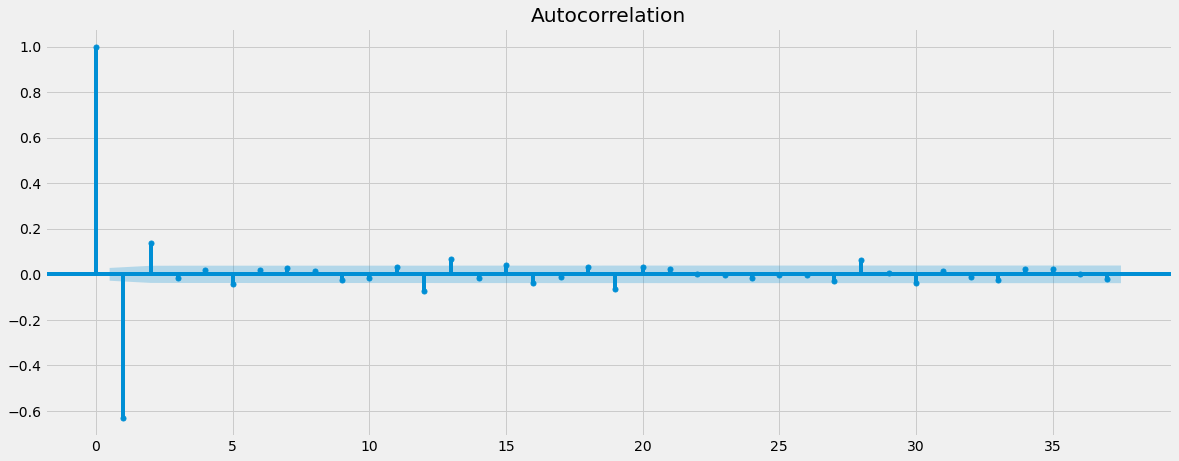

In [55]:
# Checking autocorrelations, the data is definitely stationary now

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff2)
plt.show()